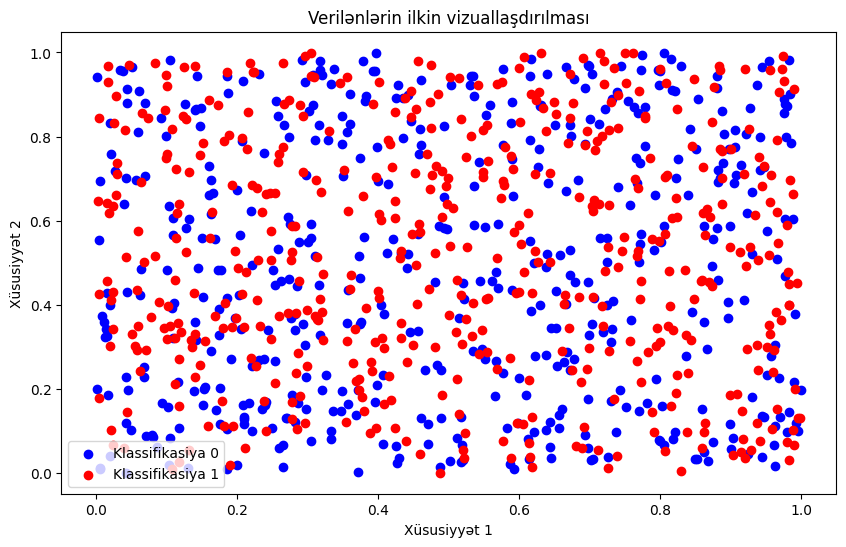

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


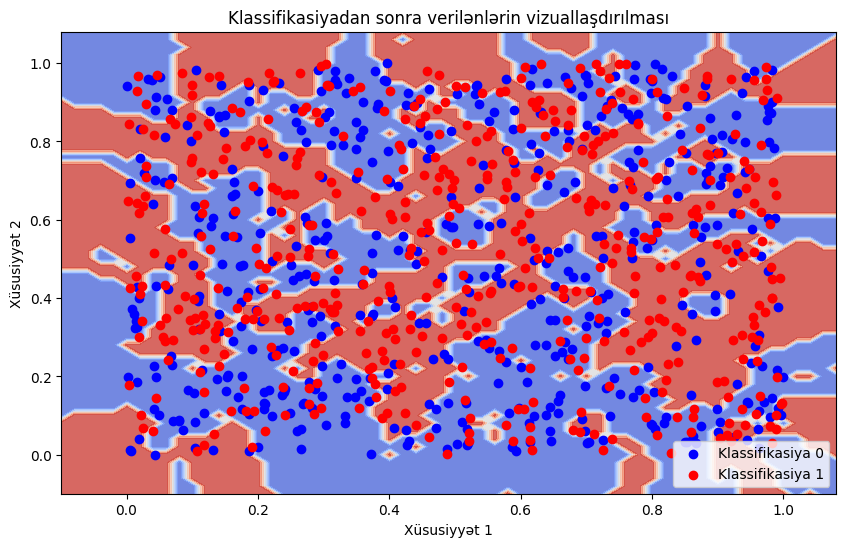

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Addım 1. Təsadüfi yolla verilənlərin yaradılması
np.random.seed(0)
X = np.random.rand(1000, 2)  # Xüsusiyyət matrisi
y = np.random.randint(0, 2, 1000)  # Klassifikasiya vektoru

# Addım 2: Yaradılmış verilənlərin .csv uzantılı faylda saxlanılması
df = pd.DataFrame(X, columns=['Xüsusiyyət_1', 'Xüsusiyyət_2'])
df['Klassifikasiya'] = y
df.to_csv('data.csv', index=False)

# Addım 3: .csv uzantılı fayldan verilənlərin götürülməsi
data = pd.read_csv('data.csv')

# Addım 4: Verilənlərin vizuallaşdırılması
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Klassifikasiya'] == 0]['Xüsusiyyət_1'], data[data['Klassifikasiya'] == 0]['Xüsusiyyət_2'], color='blue', label='Klassifikasiya 0')
plt.scatter(data[data['Klassifikasiya'] == 1]['Xüsusiyyət_1'], data[data['Klassifikasiya'] == 1]['Xüsusiyyət_2'], color='red', label='Klassifikasiya 1')
plt.title('Verilənlərin ilkin vizuallaşdırılması')
plt.xlabel('Xüsusiyyət 1')
plt.ylabel('Xüsusiyyət 2')
plt.legend()
plt.show()

# Addım 5: Verilənlərin train və test adlı altçoxluqlara ayrılması 
X_train, X_test, y_train, y_test = train_test_split(data[['Xüsusiyyət_1', 'Xüsusiyyət_2']], data['Klassifikasiya'], test_size=0.2, random_state=42)

# Addım 6: K-ən yaxın qonşu alqoritminin metod vasitəsi ilə tətbiqi
k = 5  # Cari verilənə ən yaxın qonşu olan verilənlərin sayı
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Addım 7: Klassifikasiyadan sonra verilənlərin vizuallaşdırılması
plt.figure(figsize=(10, 6))
h = .02  # Koordinat oxları üzrə nöqtələr arasında minimal məsafə - interval təyini
x_min, x_max = data['Xüsusiyyət_1'].min() - 0.1, data['Xüsusiyyət_1'].max() + 0.1
y_min, y_max = data['Xüsusiyyət_2'].min() - 0.1, data['Xüsusiyyət_2'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[data['Klassifikasiya'] == 0]['Xüsusiyyət_1'], data[data['Klassifikasiya'] == 0]['Xüsusiyyət_2'], color='blue', label='Klassifikasiya 0')
plt.scatter(data[data['Klassifikasiya'] == 1]['Xüsusiyyət_1'], data[data['Klassifikasiya'] == 1]['Xüsusiyyət_2'], color='red', label='Klassifikasiya 1')
plt.xlabel('Xüsusiyyət 1')
plt.ylabel('Xüsusiyyət 2')
plt.title('Klassifikasiyadan sonra verilənlərin vizuallaşdırılması')
plt.legend()
plt.show()